In [28]:
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import seaborn as sns
import matplotlib as mpl
mpl.rc("font", family="Malgun Gothic")

In [5]:
df1 = pd.read_csv("03_Delivery.csv", encoding="cp949")

In [27]:
df1.describe()

,상품구매금액,상품번호,수량,주문일
count,46749.00,46661.00,46749.00,46749.00
mean,69368.14,891.68,1.18,20184044.49
std,66112.47,11339.53,0.68,5192.40
min,0.00,38.00,-1.00,20170101.00
25%,32880.00,378.00,1.00,20180727.00
50%,67780.00,928.00,1.00,20181118.00
75%,92130.00,1209.00,1.00,20190225.00
max,4963400.00,999999.00,50.00,20190619.00


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46749 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46749 non-null  object 
 1   배송번호    46749 non-null  object 
 2   배송시작일   46749 non-null  object 
 3   배송완료일   46749 non-null  object 
 4   상품구매금액  46749 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46749 non-null  int64  
 7   주문경로    46749 non-null  object 
 8   주문일     46749 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [8]:
# 시간 cols
df1[["배송시작일", "배송완료일", "주문일"]]

,배송시작일,배송완료일,주문일
0,2019-01-07 오전 8:56,2019-01-11 오전 5:32,20181227
1,2019-01-03 오전 9:30,2019-01-07 오전 5:32,20181229
2,2019-01-03 오전 9:30,2019-01-07 오전 5:32,20181230
3,2019-01-03 오전 9:30,2019-01-07 오전 5:32,20181231
4,2019-01-07 오전 8:56,2019-01-11 오전 5:32,20181231
...,...,...,...
46744,2017-12-29 오후 4:32,2018-01-02 오전 5:31,20171229
46745,2018-01-03 오전 9:45,2018-01-07 오전 5:38,20171229
46746,2018-01-02 오후 7:06,2018-01-11 오전 2:46,20171230
46747,2018-01-03 오후 2:00,2018-01-06 오후 6:06,20171231


In [11]:
# 주문일 datetimeindex
df1["주문일(datetime)"] = pd.to_datetime(df1["주문일"], format="%Y%m%d")

In [12]:
df1["주문일(datetime)"]

0       2018-12-27
1       2018-12-29
2       2018-12-30
3       2018-12-31
4       2018-12-31
           ...    
46744   2017-12-29
46745   2017-12-29
46746   2017-12-30
46747   2017-12-31
46748   2017-12-31
Name: 주문일(datetime), Length: 46749, dtype: datetime64[ns]

In [14]:
df1["주문요일"] = df1["주문일(datetime)"].dt.day_name()

In [15]:
df1["주문요일"].value_counts()

Monday       9903
Wednesday    8737
Thursday     8697
Tuesday      8404
Friday       6665
Sunday       2429
Saturday     1914
Name: 주문요일, dtype: int64

In [16]:
df1["주문요일"].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Friday'], dtype=object)

In [18]:
df1["주중/주말"] = df1["주문요일"].replace({'Thursday': "주중", 'Saturday': "주말", 'Sunday': "주말", 'Monday': "주중", 'Tuesday': "주중", 'Wednesday': "주중",
       'Friday': "주중"})

In [19]:
# 주중 주문량이 주말 보다 더 많다.
df1["주중/주말"].value_counts()

주중    42406
주말     4343
Name: 주중/주말, dtype: int64

In [23]:
# 상품구매금액의 총합은 매출이다.
# 주중 매출액 > 주말 매출액이다.
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="sum")

,상품구매금액
주중/주말,
주말,306863800
주중,2936027585


In [25]:
# 상품구매금액 평균 비교 : 비슷하다.
df1.pivot_table(index="주중/주말", values="상품구매금액", aggfunc="mean")

,상품구매금액
주중/주말,
주말,70657.103385
주중,69236.136042


seaborn 라이브러리의 `barplot` 함수는 범주형 데이터의 평균값을 시각화하기 위해 많이 사용됩니다. `estimator` 매개변수를 사용하여 평균값 이외의 다른 통계량을 계산할 수 있습니다.

`estimator` 매개변수는 기본적으로 `numpy.mean` 함수로 설정되어 있으며, 각 범주별로 평균을 계산합니다. 이 외에도 다양한 통계량을 계산할 수 있는 함수를 사용할 수 있습니다. 예를 들어, `estimator` 매개변수를 `numpy.median` 함수로 설정하면 각 범주별로 중앙값을 계산합니다.

`estimator` 매개변수에 사용 가능한 함수는 다음과 같습니다.

- `numpy.mean` : 평균값을 계산합니다. (기본값)
- `numpy.median` : 중앙값을 계산합니다.
- `numpy.max` : 최대값을 계산합니다.
- `numpy.min` : 최소값을 계산합니다.
- `numpy.std` : 표준편차를 계산합니다.
- `numpy.var` : 분산을 계산합니다.

이외에도 사용자가 직접 작성한 함수를 `estimator` 매개변수에 전달하여 사용할 수 있습니다. 이때 함수는 배열을 입력값으로 받고, 하나의 값을 반환해야 합니다.

예를 들어, `estimator` 매개변수를 사용하여 각 범주별로 중앙값을 계산하고, 오차 막대를 95% 신뢰 구간으로 설정하는 코드는 다음과 같습니다.

``` python
import seaborn as sns

# tips 데이터셋 불러오기
tips = sns.load_dataset('tips')

# 각 요일별 중앙값 계산
median_vals = tips.groupby('day')['total_bill'].median().values

# estimator 매개변수에 중앙값을 계산하는 함수와 95% 신뢰 구간을 계산하는 함수 전달
g = sns.barplot(x='day', y='total_bill', data=tips, estimator=np.median, ci=95)
g.set(ylabel='Median Total Bill')


<Axes: xlabel='주중/주말', ylabel='상품구매금액'>

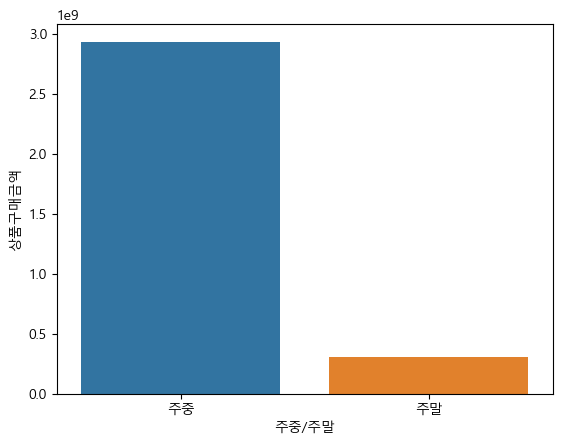

In [29]:
sns.barplot(data=df1, x="주중/주말", y="상품구매금액", estimator=sum, errorbar=None)